In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import qpsolvers

%matplotlib inline

In [2]:
banana = pd.read_csv('banana.csv')
orange = pd.read_csv('orange.csv')
apple = pd.read_csv('green_apple.csv')

basketball = pd.read_csv('basketball.csv')[2:]
football = pd.read_csv('football.csv')[1:]
tennisball = pd.read_csv('tennisball.csv')

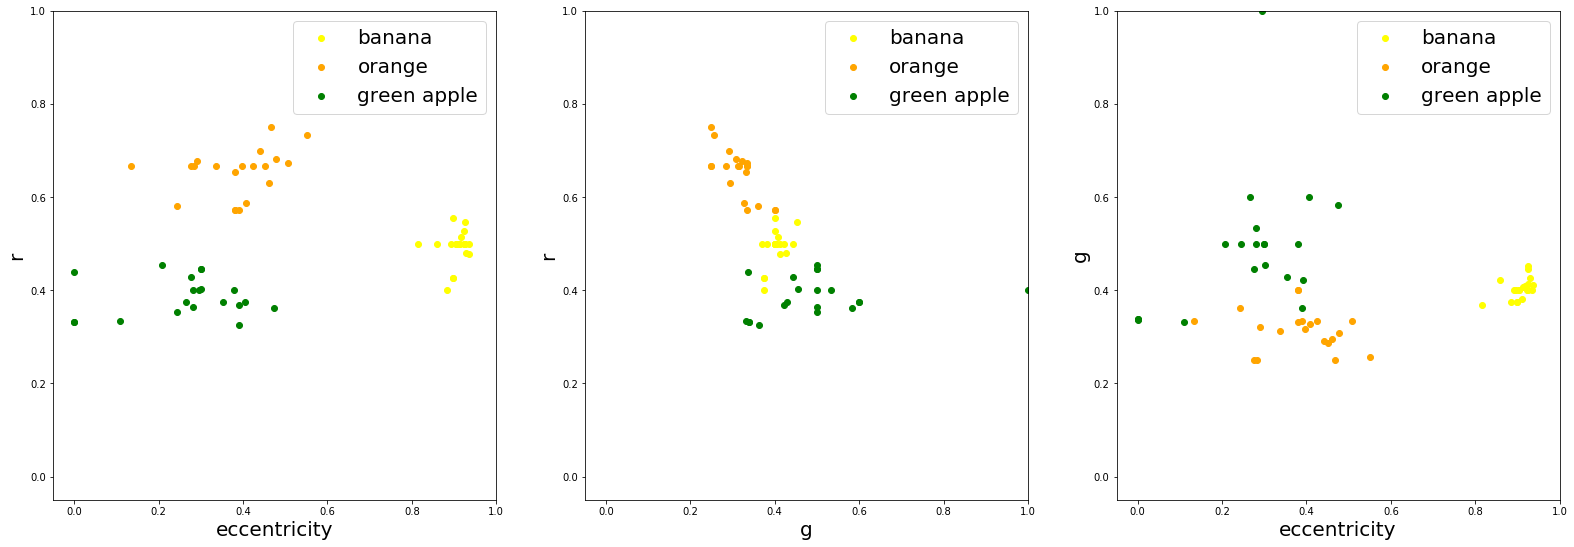

In [3]:
plt.figure(figsize=[9*3,9])
plt.subplot(131)
plt.scatter(banana['eccentricity'], banana['r'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['r'], color='orange', label='orange')
plt.scatter(apple['eccentricity'], apple['r'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=20)

plt.subplot(132)
plt.scatter(banana['g'], banana['r'], color='yellow', label='banana')
plt.scatter(orange['g'], orange['r'], color='orange', label='orange')
plt.scatter(apple['g'], apple['r'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('g', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=20)

plt.subplot(133)
plt.scatter(banana['eccentricity'], banana['g'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['g'], color='orange', label='orange')
plt.scatter(apple['eccentricity'], apple['g'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('g', fontsize=20)
plt.legend(fontsize=20)

plt.show()

In [1]:
def solve_ws(x_class1, x_class2, N):
    x = np.vstack((x_class1, x_class2))

    z = np.ones([2*N,1])
    z[N:] = -1
    
    H = (x @ x.T) * (z @ z.T)

    
    f = -np.ones(2*N)
    a = np.zeros(2*N)
    b = np.zeros(1)
    
    A = -np.eye(2*N)
    B = z.T
    
    alpha = qpsolvers.solve_qp(H+np.eye(2*N)*0.001,
                               q = f, 
                               G = A, 
                               h = a, 
                               A = B, 
                               b = b)
    alpha[alpha <1e-10] = 0

    w = (alpha * z.T) @ x
    
    indices = np.where(alpha > 0)
    w_o = (1/z[indices[0][0]]) - (w @ x[indices[0][0]])

    return w_o, w[0][0], w[0][1]

def equation(w0, w1, w2):
    m = -w1/w2
    b = -w0/w2
    return m, b

## eccentricity and r

In [5]:
x_banana = np.array(list(zip(banana['eccentricity'], banana['r'])))
x_orange = np.array(list(zip(orange['eccentricity'], orange['r'])))
x_apple = np.array(list(zip(apple['eccentricity'], apple['r'])))

#banana and orange
w0_banana_orange, w1_banana_orange, w2_banana_orange = solve_ws(x_banana, x_orange, N = 20)
m1,b1 = equation(w0_banana_orange, w1_banana_orange, w2_banana_orange)
#banana and apple
w0_banana_apple, w1_banana_apple, w2_banana_apple = solve_ws(x_banana, x_apple, N = 20)
m2,b2 = equation(w0_banana_apple, w1_banana_apple, w2_banana_apple)

#orange and apple
w0_orange_apple, w1_orange_apple, w2_orange_apple = solve_ws(x_apple, x_orange, N = 20)
m3,b3 = equation(w0_orange_apple, w1_orange_apple, w2_orange_apple)

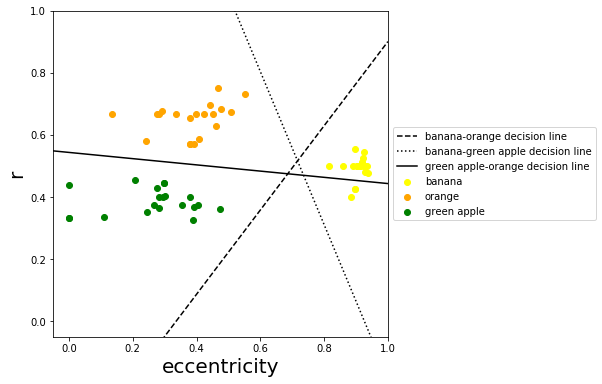

In [6]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals1 = b1 + m1*xvals
yvals2 = b2 + m2*xvals
yvals3 = b3 + m3*xvals
plt.plot(xvals, yvals1, color='black', linestyle='--', label = 'banana-orange decision line')
plt.plot(xvals, yvals2, color='black', linestyle='dotted', label = 'banana-green apple decision line')
plt.plot(xvals, yvals3, color='black', label = 'green apple-orange decision line')
plt.scatter(banana['eccentricity'], banana['r'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['r'], color='orange', label='orange')
plt.scatter(apple['eccentricity'], apple['r'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('r', fontsize=20)
plt.legend(fontsize=10,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## eccentricity and g

In [7]:
x_banana = np.array(list(zip(banana['eccentricity'], banana['g'])))
x_orange = np.array(list(zip(orange['eccentricity'], orange['g'])))
x_apple = np.array(list(zip(apple['eccentricity'], apple['g'])))

#banana and orange
w0_banana_orange, w1_banana_orange, w2_banana_orange = solve_ws(x_banana, x_orange, N = 20)
m1,b1 = equation(w0_banana_orange, w1_banana_orange, w2_banana_orange)
#banana and apple
w0_banana_apple, w1_banana_apple, w2_banana_apple = solve_ws(x_banana, x_apple, N = 20)
m2,b2 = equation(w0_banana_apple, w1_banana_apple, w2_banana_apple)

#orange and apple
w0_orange_apple, w1_orange_apple, w2_orange_apple = solve_ws(x_apple, x_orange, N = 20)
m3,b3 = equation(w0_orange_apple, w1_orange_apple, w2_orange_apple)

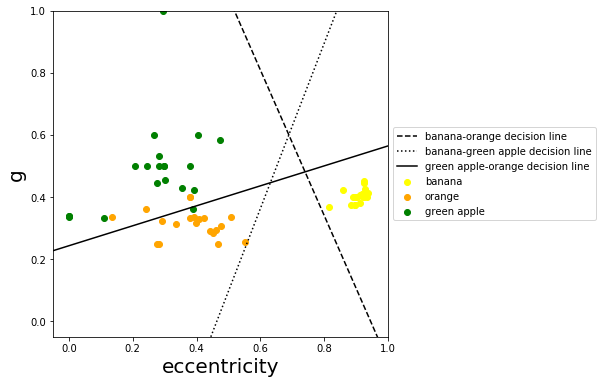

In [8]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals1 = b1 + m1*xvals
yvals2 = b2 + m2*xvals
yvals3 = b3 + m3*xvals
plt.plot(xvals, yvals1, color='black', linestyle='--', label = 'banana-orange decision line')
plt.plot(xvals, yvals2, color='black', linestyle='dotted', label = 'banana-green apple decision line')
plt.plot(xvals, yvals3, color='black', label = 'green apple-orange decision line')
plt.scatter(banana['eccentricity'], banana['g'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['g'], color='orange', label='orange')
plt.scatter(apple['eccentricity'], apple['g'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('eccentricity', fontsize=20)
plt.ylabel('g', fontsize=20)
plt.legend(fontsize=10,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## r and g

In [9]:
x_banana = np.array(list(zip(banana['r'], banana['g'])))
x_orange = np.array(list(zip(orange['r'], orange['g'])))
x_apple = np.array(list(zip(apple['r'], apple['g'])))

#banana and orange
w0_banana_orange, w1_banana_orange, w2_banana_orange = solve_ws(x_orange, x_banana, N = 20)
m1,b1 = equation(w0_banana_orange, w1_banana_orange, w2_banana_orange)
#banana and apple
w0_banana_apple, w1_banana_apple, w2_banana_apple = solve_ws(x_apple, x_banana, N = 20)
m2,b2 = equation(w0_banana_apple, w1_banana_apple, w2_banana_apple)

#orange and apple
w0_orange_apple, w1_orange_apple, w2_orange_apple = solve_ws(x_orange, x_apple, N = 20)
m3,b3 = equation(w0_orange_apple, w1_orange_apple, w2_orange_apple)

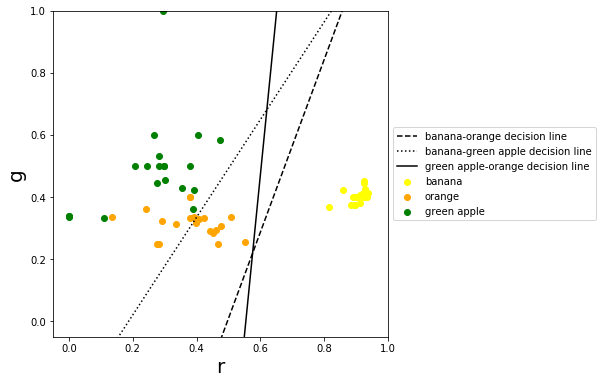

In [10]:
plt.figure(figsize=[6,6])
xvals = np.linspace(-1,1,100)
yvals1 = b1 + m1*xvals
yvals2 = b2 + m2*xvals
yvals3 = b3 + m3*xvals
plt.plot(xvals, yvals1, color='black', linestyle='--', label = 'banana-orange decision line')
plt.plot(xvals, yvals2, color='black', linestyle='dotted', label = 'banana-green apple decision line')
plt.plot(xvals, yvals3, color='black', label = 'green apple-orange decision line')
plt.scatter(banana['eccentricity'], banana['g'], color='yellow', label='banana')
plt.scatter(orange['eccentricity'], orange['g'], color='orange', label='orange')
plt.scatter(apple['eccentricity'], apple['g'], color='green', label='green apple')
plt.xlim(-0.05,1)
plt.ylim(-0.050,1)
plt.xlabel('r', fontsize=20)
plt.ylabel('g', fontsize=20)
plt.legend(fontsize=10,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()